# K-Nearest Neighbours

---

## Importation des données

In [1]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mode

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
X = X[:,0:3:2]
data = np.c_[X,y]

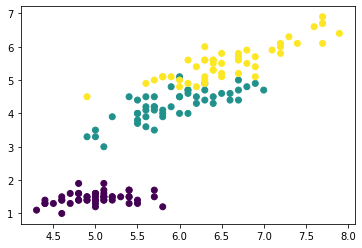

In [4]:
plt.scatter(data[:,0], data[:,1], c=data[:,-1]);

## KNN : Sklearn

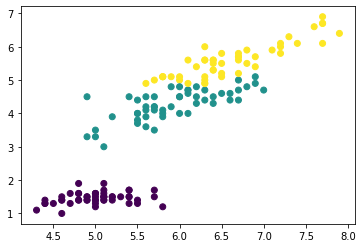

In [15]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=4, metric=)
knn.fit(X,y)
predict = knn.predict(X)

plt.scatter(data[:,0], data[:,1], c=predict);

## KNN : Implémentation

In [8]:
def KNN(X,y, n_neighbours=3):
    """
    Algorithme de clustering : K-nearest neighbours
    """
    
    X_ = np.c_[X,y]
    predict_label = np.zeros(X_.shape[0])

    for number, line in enumerate(X_):
        new_array = np.delete(X_, number, axis=0)
        dist = np.zeros((new_array.shape[0],2))
        
        for n_line, element in enumerate(new_array):
            dist[n_line,0] = np.linalg.norm(line[:-1] - element[:-1])
            dist[n_line,1] = element[-1]
        
        dist = dist[dist[:,0].argsort()]
        dist = dist[:n_neighbours]
        
        if (n_neighbours % 2 != 0):
            predict_label[number] = mode(dist[:,1]).mode
            
        else :
            predict_label[number] = mode(dist[:,1]).mode
    
    return predict_label

In [16]:
predict_lab = KNN(X,y, n_neighbours=4)

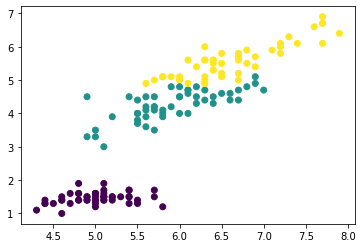

In [17]:
plt.scatter(data[:,0], data[:,1], c=predict_lab);